In [1]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)


# PROVIDE PATH TO MODEL DIRECTORY
#PATH_TO_MODEL_DIR = args.model
PATH_TO_MODEL_DIR = r'C:\Users\amir\Desktop\Face_Mask_Detection\workspace\training_demo\exported-models\my_mobilenet_model'
# PROVIDE PATH TO LABEL MAP
#PATH_TO_LABELS = args.labels
PATH_TO_LABELS = r'C:\Users\amir\Desktop\Face_Mask_Detection\workspace\training_demo\annotations\label_map.pbtxt'

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

image_dir = os.path.join('images/test')

def model(image, MIN_CONF_THRESH=.5):
    print('Loading model...', end='')
    start_time = time.time()
    IMAGE_PATHS = os.path.join(image_dir, image)
    # LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
    detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print('Done! Took {} seconds'.format(elapsed_time))

    # LOAD LABEL MAP DATA FOR PLOTTING

    category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


    #import warnings
    #warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

    print('Running inference for {}... '.format(IMAGE_PATHS), end='')

    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=MIN_CONF_THRESH,
          agnostic_mode=False)

    print('Done')
    
    image_with_detections = cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_detections)

In [2]:
model('image (1).jpg', 0.5)

Loading model...Done! Took 16.631025075912476 seconds
Running inference for images/test\image (1).jpg... Done


Loading model...Done! Took 17.186205625534058 seconds
Running inference for images/test\image (2).jpg... Done


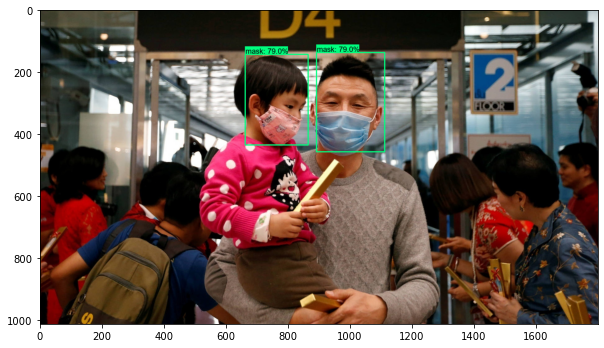

In [41]:
model('image (2).jpg', 0.55)

Loading model...Done! Took 16.13542103767395 seconds
Running inference for images/test\image (3).jpg... Done


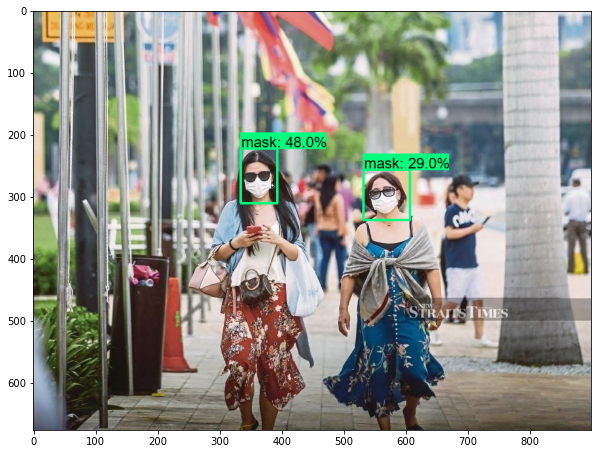

In [21]:
model('image (3).jpg', 0.28)

Loading model...Done! Took 15.486796140670776 seconds
Running inference for images/test\image (4).jpg... Done


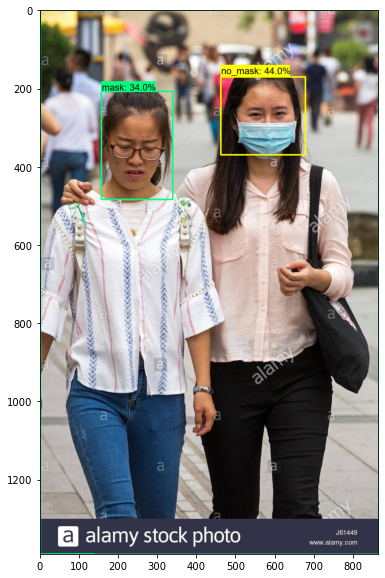

In [25]:
model('image (4).jpg', 0.3)

In [27]:
model('image (5).jpg', 0.5)

Loading model...Done! Took 17.233612298965454 seconds
Running inference for images/test\image (5).jpg... Done


In [28]:
model('image (6).jpg', 0.5)

Loading model...Done! Took 21.180914878845215 seconds
Running inference for images/test\image (6).jpg... Done


In [29]:
model('image (7).jpg', 0.5)

Loading model...Done! Took 15.707051277160645 seconds
Running inference for images/test\image (7).jpg... Done


Loading model...Done! Took 14.981445789337158 seconds
Running inference for images/test\53.jpg... Done


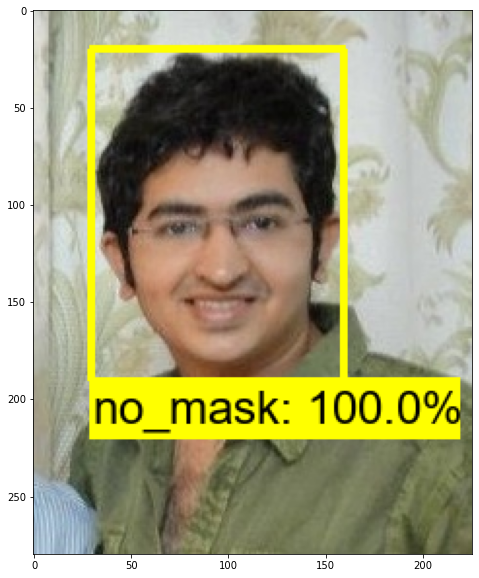

In [30]:
model('53.jpg', 0.5)

In [32]:
model('20.jpg', 0.5)

Loading model...Done! Took 15.636358737945557 seconds
Running inference for images/test\20.jpg... Done


In [38]:
model('LDXH5JA1MO6WFZEC4BVR.jpg', .3)

Loading model...Done! Took 17.069462060928345 seconds
Running inference for images/test\LDXH5JA1MO6WFZEC4BVR.jpg... Done


Loading model...Done! Took 15.85633659362793 seconds
Running inference for images/test\LCNSR7KOQPMF9THVI14D.jpg... Done


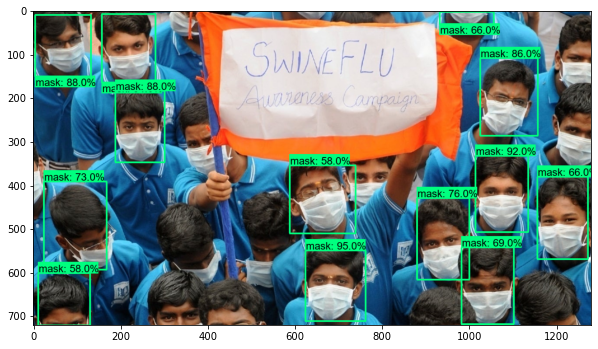

In [36]:
model('LCNSR7KOQPMF9THVI14D.jpg', .5)

Loading model...Done! Took 16.366498947143555 seconds
Running inference for images/test\4.jpg... Done


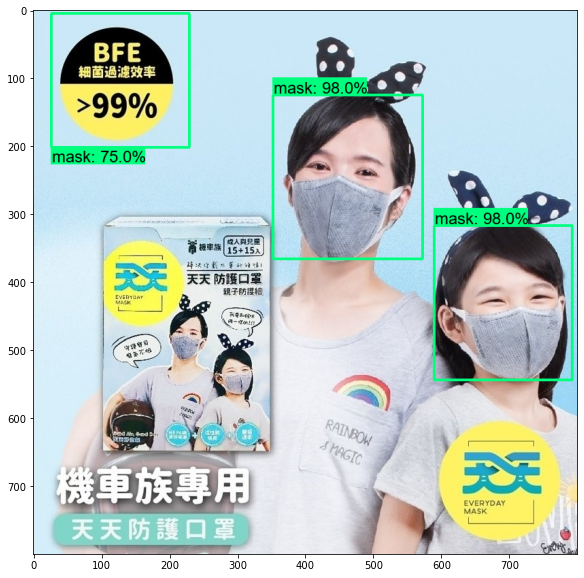

In [40]:
model('4.jpg', .5)